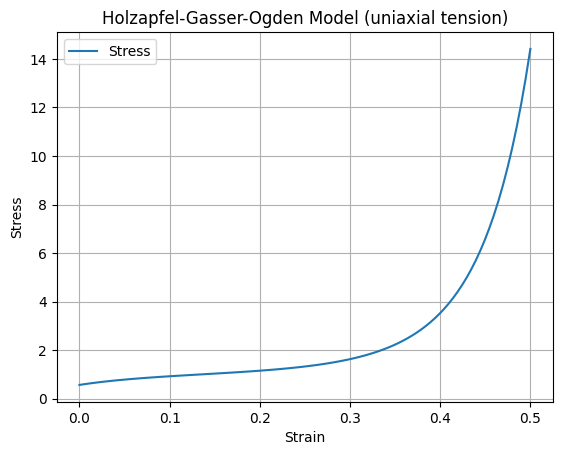

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def holzapfel_gasser_ogden_model_uniaxial_tension(strain, params):
    C = params['C']
    k1 = params['k1']
    k2 = params['k2']
    kappa = params['kappa']
    theta = params['theta']

    # Deformation invariants
    I1 = 1 + 2 * strain  # First invariant (for uniaxial tension)
    I4 = 1 + 2 * strain * np.cos(theta)**2  # Fiber-related invariant

   # Strain energy of an isotropic matrix
    Psi_iso = C * (I1 - 3)

    # Strain energy of the anisotropic part (fiber)
    E_fiber = kappa * (I1 - 3) + (1 - 3 * kappa) * (I4 - 1)
    Psi_aniso = (k1 / (2 * k2)) * (np.exp(k2 * E_fiber**2) - 1)

    # Derivative of Psi_iso by strain
    dPsi_iso_dstrain = 2 * C  # Derivative of I1 by strain

    # Derivative of Psi_aniso by strain
    dE_fiber_dstrain = 2 * kappa + 2 * (1 - 3 * kappa) * np.cos(theta)**2
    dPsi_aniso_dstrain = k1 * E_fiber * np.exp(k2 * E_fiber**2) * dE_fiber_dstrain

    # Stress (derivative of total energy with respect to strain)
    stress = dPsi_iso_dstrain + dPsi_aniso_dstrain

    return stress

# Example use
if __name__ == "__main__":
    # Model parameters
    params = {
        'C': 0.5,       # Isotropic matrix parameter
        'k1': 1.0,      # Collagen fiber parameter
        'k2': 10.0,     # Collagen fiber parameter
        'kappa': 0.1,   # Fiber orientation parameter
        'theta': np.pi/10  # Fiber orientation angle
    }

    # Strain (for example at 0 to 0.5)
    strains = np.linspace(0, 0.5, 100)

    # Stress calculation
    stresses = holzapfel_gasser_ogden_model_uniaxial_tension(strains, params)

    plt.plot(strains, stresses, label="Stress")
    plt.xlabel("Strain")
    plt.ylabel("Stress")
    plt.title("Holzapfel-Gasser-Ogden Model (uniaxial tension)")
    plt.legend()
    plt.grid()
    plt.show()